In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score

import keras
from keras.models import Model, Sequential
from keras.layers import Input, LSTM, Dense, Flatten, Embedding, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

# 配置中文环境
plt.style.use('seaborn-v0_8')  # 使用seaborn风格
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# inline嵌入文件，tk弹出画图窗口
%matplotlib inline

In [27]:
# 读取文件信息
df = pd.read_csv(r"D:\Study\Python\DataVisualization\datasets\B站\B站每周必看(-2024.11.24).csv")
column = df.columns
df

,id,名称,UP主,IP地址,热评,网站,时间,观看次数,点赞数,收藏数,投币数,转发数,时长(秒),标签,弹幕数,详细时间,up网址,摘要
0,1,340km/h，我把自己变成了一颗流星...,阿宇的科学冒险,湖北,自制和首飞【单人高空高速飞行翼】的故事,https://b23.tv/BV1NeULY2EV2,2024-11-18,6045945,538154,129773,293645,25845,810.0,科技/极客DIY/自制/DIY/硬核/翼装飞行/极客/极限运动/vivo X200/vivo...,8350,2024-11-15 12:00:00,https://space.bilibili.com/431956189,能活下来并且亲手发布这个视频，对我来说是一个奇迹… 本期节目是我用生命来完成的...
1,2,湘西赶尸，改了这么久终于可以发出来了,江寻千,广东,当一回赶尸人，让落叶归根,https://b23.tv/BV1uemfYrE2h,2024-11-18,4268920,292443,132574,227162,36641,1271.0,知识/人文历史/传统文化/奇闻/赶尸/湘西/未解之谜/寻找非遗手艺人,1.2万,2024-11-15 21:07:01,https://space.bilibili.com/1895195099,NaN
2,3,十个军事博主，9个涉黄，1个涉密，刚抓！,大漠叔叔,海南,真想买一台上路,https://b23.tv/BV1oFUCYkELx,2024-11-18,3493920,217982,23607,65934,6845,598.0,生活/出行/歼20/搞笑/飞行/漠叔/歼35/珠海航展/轰20,1.4万,2024-11-17 18:54:46,https://space.bilibili.com/67141499,-
3,4,逐句解析！为什么最爱的人会说出最伤人的话？深度解读《花束般的恋爱》,木鱼水心,北京,了解爱情的真相,https://b23.tv/BV1omUfYRE8F,2024-11-18,1428679,90306,47970,61143,18183,3594.0,影视/影视杂谈/有村架纯/电影解说/菅田将晖/木鱼水心/25格/花束般恋爱/花束般的恋愛/影...,1.1万,2024-11-19 18:57:33,https://space.bilibili.com/927587,这是一部先甜后狠的电影 有人说千万别看 因为情侣看完会马上分手 单身看完则会爱情观崩塌 有人...
4,5,【半佛】B站财报，充满社会毒打,硬核的半佛仙人,浙江,一起进步,https://b23.tv/BV1DkUtYZE8f,2024-11-18,2150271,84725,12996,9244,1966,350.0,知识/财经商业/生活/学习/财经/知识/科普/B站/科技/商业/财报/青年用「财」图鉴4.0,2505,2024-11-19 17:00:00,https://space.bilibili.com/37663924,阿B真的是不容易
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10342,10343,【纯黑】《鬼泣5》一周目无伤S评价攻略解说 第七期,-纯黑-,NaN,NaN,https://b23.tv/BV1Cb41147EK,2019/3/25,1492241,64878,19197,75463,1058,902.0,游戏/单机游戏/无伤/纯黑/S评价/解说/攻略/鬼泣5,5842,2019-03-25 16:19:16,https://space.bilibili.com/585267,一周目最高难度，不是游戏最高难度。剧情杀以外无伤。 微博：@纯黑GK 直播间：www.zh...
10343,10344,化身修罗只为守护你！此刻世界将为之颤抖！,烟季,NaN,NaN,https://b23.tv/BV1gb41177rt,2019/3/25,7156797,408961,324002,417335,31699,163.0,动画/MAD·AMV/进击的巨人/刀剑神域/Fate/刺客伍六七/火影/游戏人生/一拳超人/...,1.6万,2019-03-22 20:15:58,https://space.bilibili.com/15377173,"BGM：「Tommee Profitt,Jung Youth,Fleurie - In th..."
10344,10345,破案大师老番茄,老番茄,NaN,NaN,https://b23.tv/BV1Sb411j75C,2019/3/25,6537581,138220,26800,51529,2929,1114.0,游戏/单机游戏/老番茄/奥伯拉丁的回归/Obra Dinn,1.6万,2019-03-22 12:00:11,https://space.bilibili.com/546195,游戏：Return of the Obra Dinn
10345,10346,[LPL春季赛] 3月23日 RNG vs IG,哔哩哔哩英雄联盟赛事,上海,NaN,https://b23.tv/BV19b411774z,2019/3/25,3997258,40721,21570,25948,5810,2705.0,游戏/电子竞技/英雄联盟/电子竞技/LPL,10.9万,2019-03-23 21:20:31,https://space.bilibili.com/50329118,[LPL春季赛] 3月23日 RNG vs IG


### 初步分析

In [13]:
items = [
    [
        col,
        df[col].dtype,
        df[col].nunique(),
        list(df[col].unique()[:3]),
        df[col].isnull().sum()
    ] for col in df
]

display(pd.DataFrame(data=items, columns=[
    '列名',
    '类型',
    '唯一值数量',
    '唯一值例子',
    '缺失值数量'
]))

,列名,类型,唯一值数量,唯一值例子,缺失值数量
0,id,int64,10347,"[1, 2, 3]",0
1,名称,object,10299,"[340km/h，我把自己变成了一颗流星..., 湘西赶尸，改了这么久终于可以发出来了, 十...",0
2,UP主,object,3518,"[阿宇的科学冒险, 江寻千, 大漠叔叔]",0
3,IP地址,object,61,"[湖北, 广东, 海南]",4012
4,热评,object,10201,"[自制和首飞【单人高空高速飞行翼】的故事, 当一回赶尸人，让落叶归根, 真想买一台上路]",43
5,网站,object,10306,"[https://b23.tv/BV1NeULY2EV2, https://b23.tv/B...",0
6,时间,object,292,"[2024-11-18, 2024-11-11, 2024-11-04]",0
7,观看次数,int64,10304,"[6045945, 4268920, 3493920]",0
8,点赞数,int64,10241,"[538154, 292443, 217982]",0
9,收藏数,int64,10021,"[129773, 132574, 23607]",0


### 数据预处理

In [30]:
def exchange_num(row):
    try:
        return float(row)
    except ValueError:
        num = row.split('万')[0]
        return  float(num) * 10000

df['时间'] = pd.to_datetime(df['时间'].str.replace('/', '-'))
df['详细时间'] = pd.to_datetime(df['详细时间'])
df['弹幕数'] = df['弹幕数'].apply(exchange_num)

### IP定位情况

In [31]:
# 按'时间'分组，并计算每组的IP地址总数和IP为空的总数
result = df.groupby('时间').agg(
    无IP的总数=('IP地址', lambda x: x.isnull().sum())
).reset_index()
result.sort_values(by='时间')

,时间,无IP的总数
0,2019-03-25,7
1,2019-04-01,12
2,2019-04-08,12
3,2019-04-15,9
4,2019-04-22,9
...,...,...
287,2024-10-21,1
288,2024-10-28,0
289,2024-11-04,0
290,2024-11-11,1


In [32]:
# 寻找IP地址普及的日期
for index, row in result.iterrows():
    if row['无IP的总数'] < 1:
        print(f"IP地址普及时间：{row['时间']}")
        break

IP地址普及时间：2022-07-04 00:00:00


### UP主收录情况

In [33]:
# 计算每个UP主的平均热度并降序排列
avg_hot_by_up = df.groupby('UP主')['观看次数'].mean().sort_values(ascending=False).reset_index()
# 给排序后的结果加上排名
rank = pd.DataFrame({'排名': range(1, len(avg_hot_by_up) + 1)}).astype(int)
avg_hot_by_up = pd.concat([rank, avg_hot_by_up], axis=1)
avg_hot_by_up.rename(columns={'观看次数': '平均热度'}, inplace=True)
avg_hot_by_up

,排名,UP主,平均热度
0,1,三笠・阿克曼,58533955.0
1,2,一只风风o,54177878.0
2,3,野纯Cz,53545948.0
3,4,百年影视馆,47754081.0
4,5,钓可尔太曼,39042389.0
...,...,...,...
3513,3514,鲁皓辰,275685.0
3514,3515,我在降妖现场呢,229375.0
3515,3516,妃说电影,224644.0
3516,3517,烛不遥,220970.0


In [34]:
# 植物大战僵尸杂交版作者排名
avg_hot_by_up[avg_hot_by_up['UP主'] == '潜艇伟伟迷']

,排名,UP主,平均热度
578,579,潜艇伟伟迷,7212083.0


### 不同项之间的关系

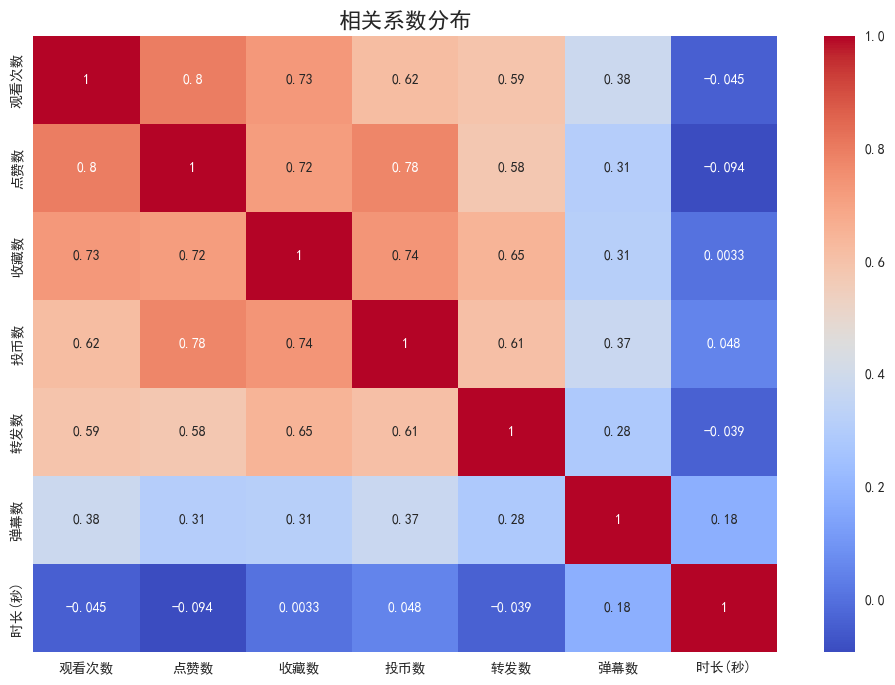

In [37]:
# 计算相关系数矩阵
corr_matrix = df[['观看次数', '点赞数', '收藏数', '投币数', '转发数', '弹幕数', '时长(秒)']].corr()
# 可视化相关系数矩阵
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('相关系数分布', fontsize=16);

### 近12个月各自的平均流量和平均点赞数

In [38]:
# 去除日，仅保留年月
def drop_day(s):
    lst_s = str(s).split('-')
    return lst_s[0] + '-' + lst_s[1]

df['时间'] = df['时间'].apply(drop_day)
avg_look_star = df.groupby('时间')[['观看次数', '点赞数']].mean()  
avg_look_star

,观看次数,点赞数
时间,,
2019-03,6.643019e+06,249491.400000
2019-04,3.976574e+06,190213.212121
2019-05,5.029408e+06,231649.019608
2019-06,7.057020e+06,360750.930556
2019-07,7.647545e+06,433063.163934
...,...,...
2024-07,4.283657e+06,313429.111111
2024-08,4.117318e+06,312815.236025
2024-09,2.865235e+06,194126.033708


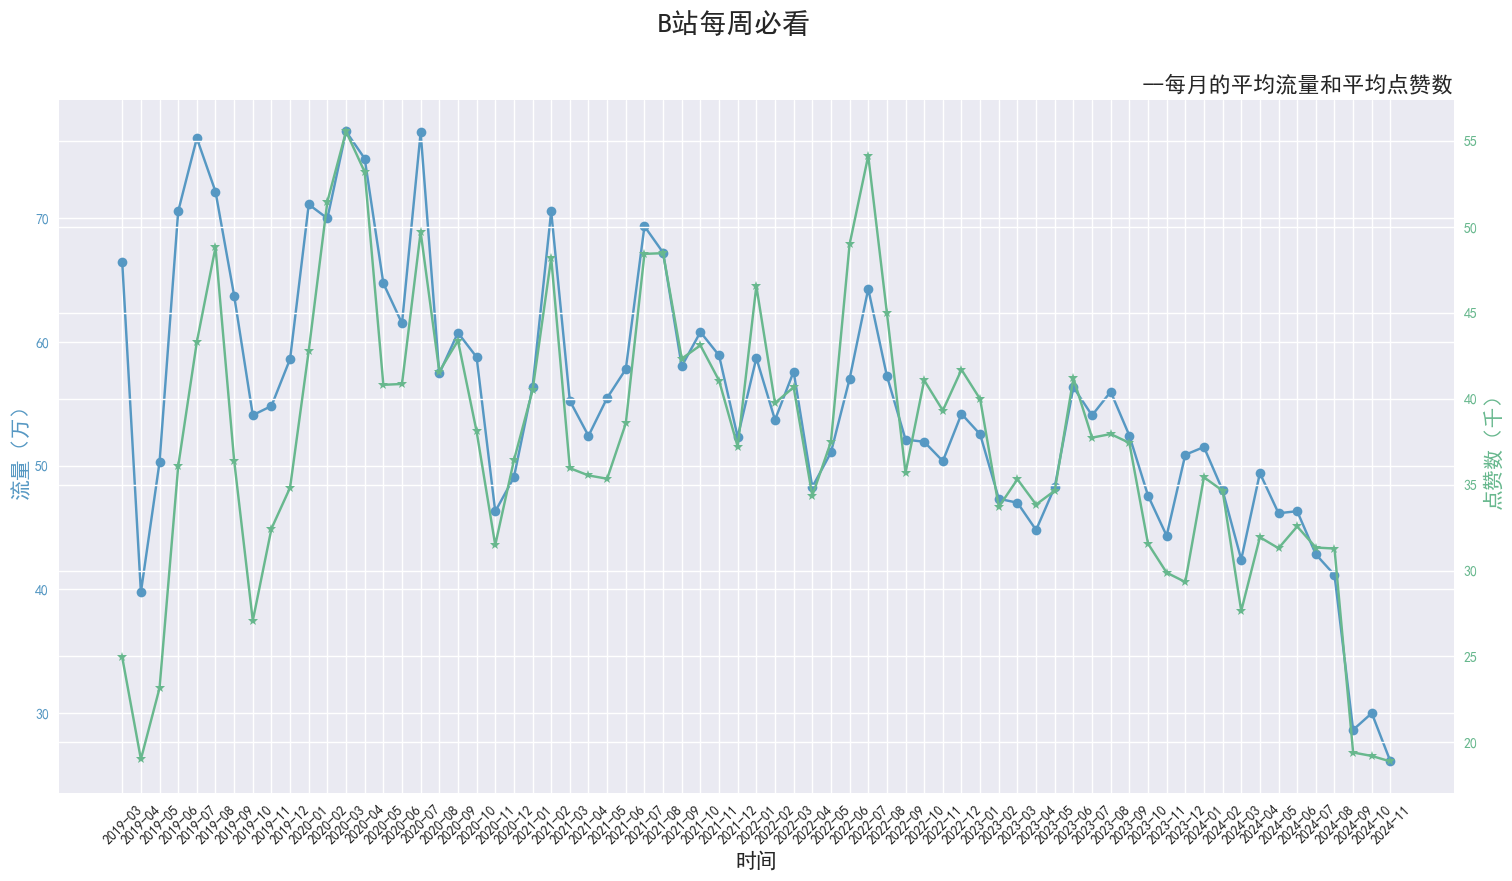

In [39]:
# 创建一个新的图形和一个子图
fig3, ax1 = plt.subplots(figsize=(18, 9))
x_time = avg_look_star.index  # 日期
y1_look = avg_look_star['观看次数'].values / 10e+4   # 观看次数（万）
y2_star = avg_look_star['点赞数'].values / 10e+3  # 点赞数（千）

# 在第一个子图上画第一条线，并设置它的颜色
ax1.plot(x_time, y1_look, '-o', color='#5698c3')
ax1.set_xlabel('时间', fontsize=15)  # 设置x轴标签
ax1.set_ylabel('流量（万）', color='#5698c3', fontsize=15)  # 设置y轴标签和颜色
ax1.tick_params(axis='y', labelcolor='#5698c3')  # 设置y轴刻度颜色

# 创建一个共享x轴的第二个子图
ax2 = ax1.twinx()
ax2.plot(x_time, y2_star, '-*', color='#68b88e')
ax2.set_ylabel('点赞数（千）', color='#68b88e', fontsize=15)  # 设置第二个y轴的标签和颜色
ax2.tick_params(axis='y', labelcolor='#68b88e')  # 设置第二个y轴的刻度颜色

#  设置x轴刻度，并旋转45度
ax1.set_xticks(x_time)
ax1.set_xticklabels(x_time, rotation=45)

plt.suptitle('B站每周必看', fontsize=20)
plt.title('--每月的平均流量和平均点赞数', fontsize=16, loc='right');

### 不同省份主播人数占比，取前八

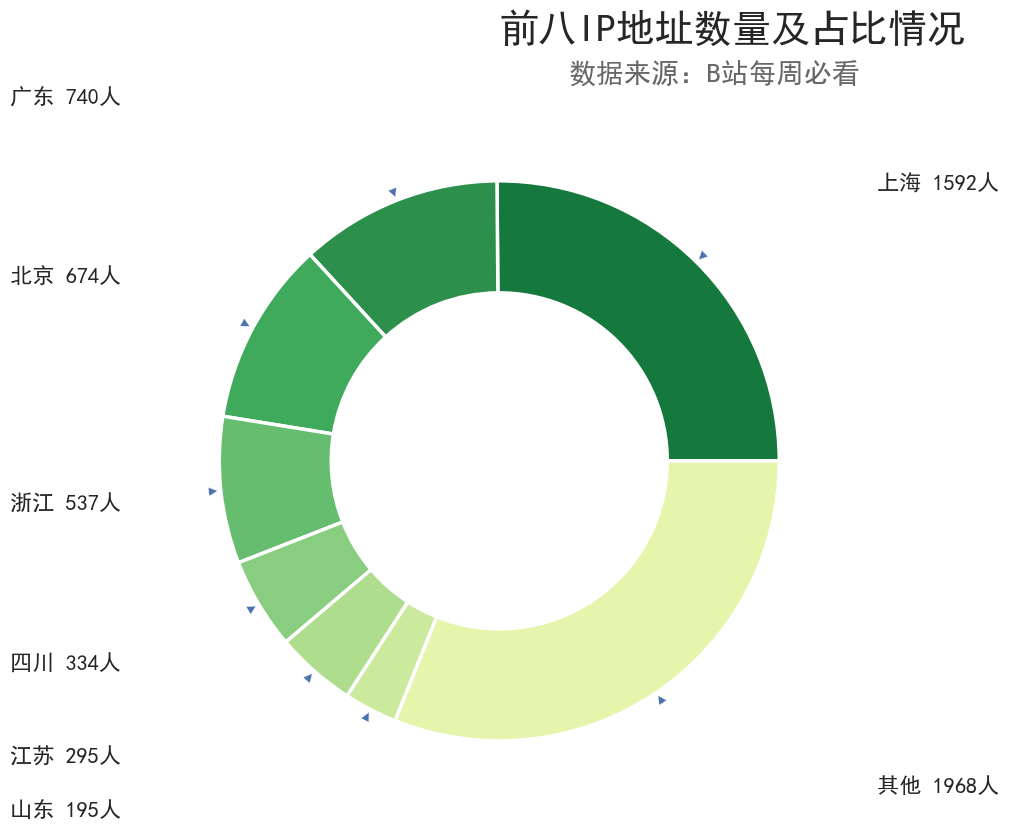

In [40]:
top_ip = df.groupby('IP地址')['UP主'].count().sort_values(ascending=False)
# 画环形图（前八位）
top8_ip_site = top_ip[:7].index.to_list() + ['其他']
top8_ip_value = list(top_ip[:7].values) + [top_ip[7:].values.sum()]
fig1 = plt.subplots(figsize=(10, 8))  # 创建画布

cmap = plt.get_cmap('YlGn_r')
colors = cmap(np.linspace(.2, .8, len(top8_ip_site)))
wedges, texts=plt.pie(top8_ip_value, colors=colors, wedgeprops={'width': 0.4, 'lw':2.5, 'ec':'#fff'})

# 绘制一个白色的圆在中心（将饼图转换为环形图）
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 注释样式，arrowprops：箭头样式，va：注释的对齐方式
kw = dict(arrowprops=dict(arrowstyle='-|>'), va='center')
# 添加注释
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
    connectionstyle = 'angle,angleA=0,angleB={}'.format(ang)
    kw['arrowprops'].update({'connectionstyle': connectionstyle})
    
    if top8_ip_site[i] == '其他':
        text_text = top8_ip_site[i] + ' ' + str(top8_ip_value[i]) + '人'
    else:
        text_text = top8_ip_site[i] + ' ' + str(top8_ip_value[i]) + '人'
    
    plt.annotate(text_text, 
                 xy=(x, y),
                 xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, 
                 fontsize=16, 
                 **kw)

plt.text(0, 1.5, '前八IP地址数量及占比情况', fontsize=28)
plt.text(0.25, 1.35, '数据来源：B站每周必看', fontsize=20,alpha=.7)
plt.axis('equal');
    

### UP主数量前十的地区的平均观看次数和点赞数

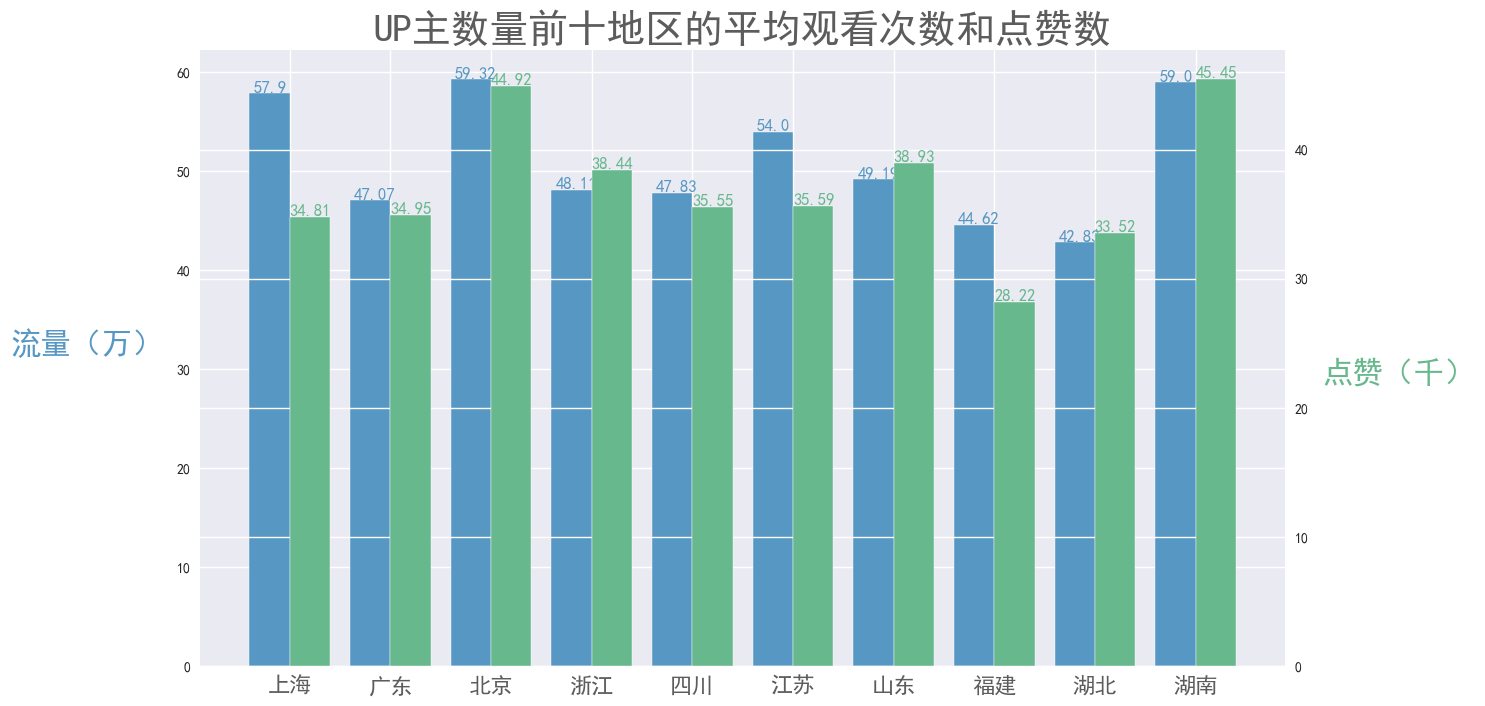

In [41]:
top10_site = top_ip[:10].index  # 前十的地区
top10_ip_site = df[df['IP地址'].isin(top10_site)].groupby('IP地址')
# 平均观看次数
look_ip_mean = round(top10_ip_site['观看次数'].mean() / 10e+4, 2).values  # 单位：万，保留两位
# 平均点赞数
star_ip_mean = round(top10_ip_site['点赞数'].mean() / 10e+3, 2).values  # 单位：千，同上

# 画共享x轴的条形图
fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))
ax2 = ax1.twinx()

# 添加相关参数
total_width, n = 0.8, 2
width = total_width / n

# 开始绘图
x = np.arange(len(top10_site))
ax1.bar(x - width / 2, look_ip_mean, width=width, color='#5698c3', label='流量', zorder=3)
ax2.bar(x + width / 2, star_ip_mean, width=width, color='#68b88e', label='点赞', zorder=2)

ax1.set_xticks(x, top10_site, fontsize=16, alpha=.75)
ax1.set_ylabel('流量（万）', labelpad=65, fontsize=22, rotation=0, color='#5698c3')
ax2.set_ylabel('点赞（千）', labelpad=65, fontsize=22, rotation=0, color='#68b88e')

# 给每个条形加注释
for a,b in zip(x - width, look_ip_mean):
    ax1.text(a+0.04, b+0.09, str(b), color='#5698c3', fontsize=12)
for a,b in zip(x, star_ip_mean):
    ax2.text(a, b+0.1, str(b), color='#68b88e', fontsize=12)

plt.title('UP主数量前十地区的平均观看次数和点赞数', fontsize=28, alpha=.75);

### 视频摘要长短与流量的关系

In [42]:
# 画堆叠条形图
def draw_bar(ax, label, item):
    sum_value = item.count()  # 统计总数
    grouped = item.value_counts()  # 每种热度的数量
    per_hot = round((grouped / sum_value) * 100, 2)  # 每种热度的百分比
    # 保存数值
    value_num = per_hot.values  
    value_name = per_hot.index  
    
    # 构建条形
    bar1 = ax.bar([1], value_num[0], label=value_name[0])
    bar2 = ax.bar([1], value_num[1], bottom=value_num[0], label=value_name[1])
    bar3 = ax.bar([1], value_num[2], bottom=value_num[0]+value_num[1], label=value_name[2])
    bar4 = ax.bar([1], value_num[3], bottom=value_num[0]+value_num[1]+value_num[2], label=value_name[3])
    lst_bar = [bar1, bar2, bar3, bar4]  # 保存在列表中
    
    # 画堆叠条形图
    ax.bar_label(bar4, fontsize=18, fmt=f'{sum_value}个')
    
    # 将图形的所有边框线都设置为不可见
    for spine in ax.spines.values():  
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(label, fontsize=18)

# 计算每一个视频摘要的长短
def len_summary(s):
    return len(str(s))

df['摘要长度'] = df['摘要'].apply(len_summary)

In [43]:
# 将摘要长度分成五种，并统计每种个数
summary_label = ['很短', '较短', '一般', '较长', '很长']
df['摘要标签'] = pd.cut(df['摘要长度'], bins=5, labels=summary_label)

# 将热度（观看次数）分成四种
hot_label = ['低温', '中温', '高温', '超高温']
df['热度标签'] = pd.cut(df['观看次数'], bins=[0, 3000000, 6000000, 9000000, 12000000], labels=hot_label)

# 将二者合并
summary_hot = pd.concat([df['摘要标签'], df['热度标签']], axis=1)
grouped_summary = summary_hot.groupby('摘要标签', observed=True)

# 统计各个类别的总数
print(summary_hot.value_counts('摘要标签'))
print(summary_hot.value_counts('热度标签'))

摘要标签
很短    10038
较短      200
一般       54
较长       38
很长       17
Name: count, dtype: int64
热度标签
中温     3900
低温     3405
高温     1655
超高温     662
Name: count, dtype: int64


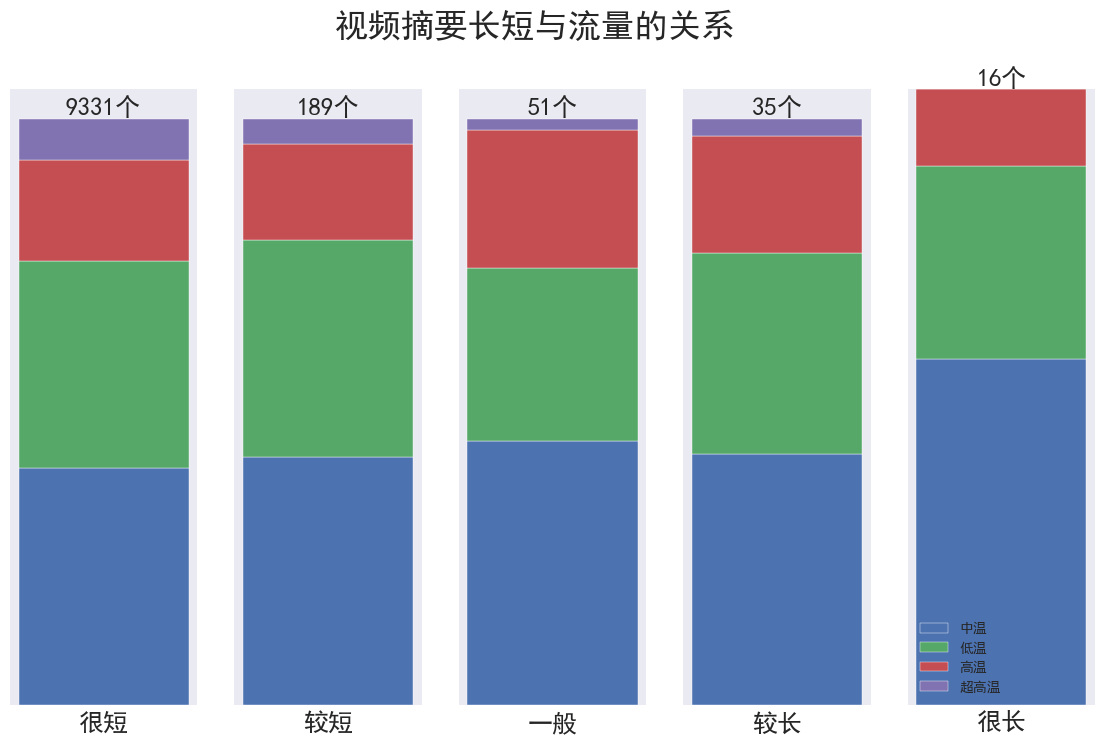

In [44]:
# 分类并画图
fig4, ax = plt.subplots(1,5,figsize=(14,8))
for i, item in enumerate(grouped_summary):
    summary_item = pd.Series(item[1]['热度标签'])  # 由元组转换Series，便于统计
    # 画堆叠条形图
    draw_bar(ax[i], summary_label[i], summary_item)

fig4.suptitle('视频摘要长短与流量的关系', fontsize=24)
plt.legend();

### 构建神经网络

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1041 - mae: 0.2947 - val_loss: 0.0286 - val_mae: 0.1235
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - mae: 0.1129 - val_loss: 0.0172 - val_mae: 0.1047
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0162 - mae: 0.0960 - val_loss: 0.0172 - val_mae: 0.0885
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0235 - mae: 0.1040 - val_loss: 0.0150 - val_mae: 0.0860
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mae: 0.0893 - val_loss: 0.0151 - val_mae: 0.0852
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mae: 0.0844 - val_loss: 0.0150 - val_mae: 0.0860
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mae: 0.0945 - val_loss: 0.0150 - val_mae: 0.0859
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mae: 0.0915 - val_loss: 0.0150 - val_mae: 0.0858
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.01

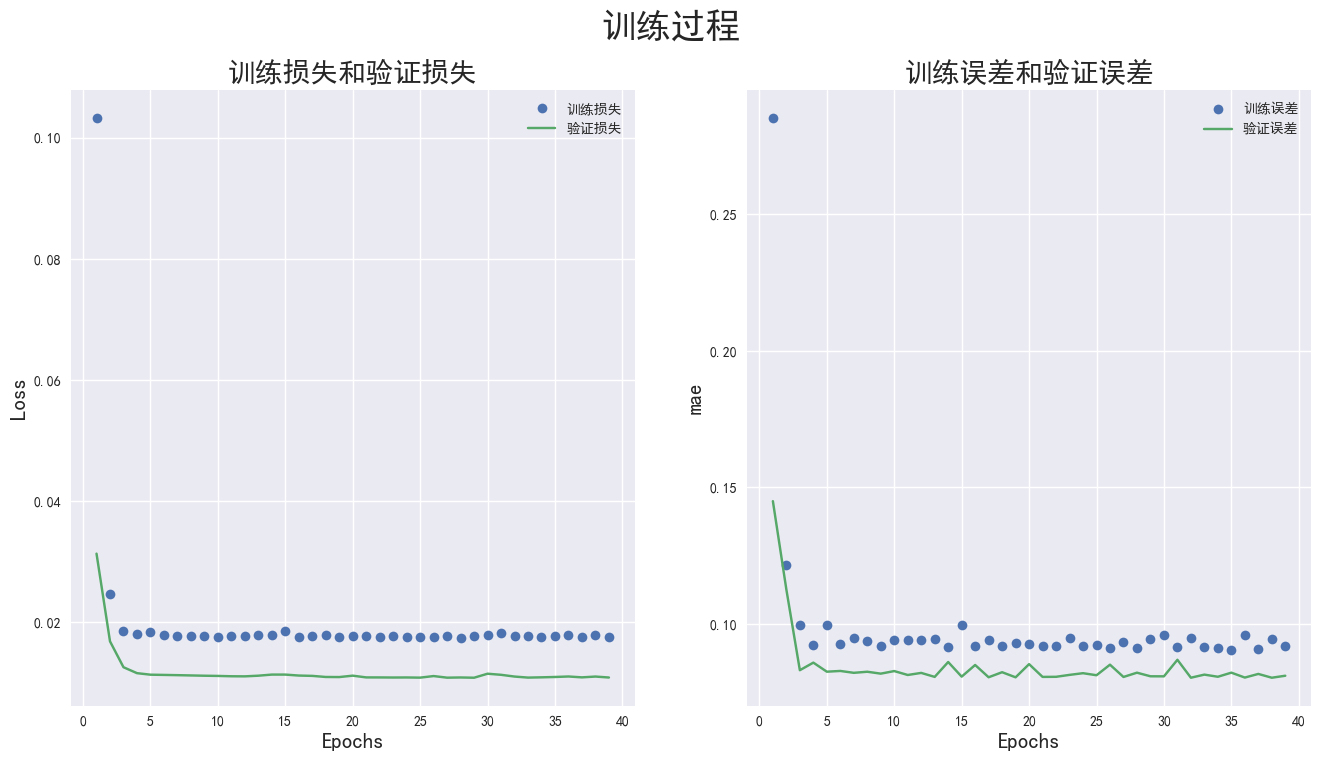

In [47]:
# 数据预处理
def create_sequences(data, n_steps):
    X = [data[i:i+n_steps] for i in range(len(data) - n_steps)]
    y = [data[i+n_steps] for i in range(len(data) - n_steps)]
    return np.array(X), np.array(y)

# 读取数据
df = pd.read_csv(r"D:\Study\Python\DataVisualization\datasets\B站\B站每周必看.csv")
avg_time_hot = df.groupby('时间')['观看次数'].mean().reset_index()
avg_time_hot.rename(columns={'观看次数': '平均热度'}, inplace=True)
data = avg_time_hot['平均热度'].values.reshape(-1, 1)

# # 数据预处理，使数据分布接近标准正态分布
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 创建序列和标签
n_steps = 3
X, y = create_sequences(data_scaled, n_steps)
# 确保X的形状为 (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 定义K折交叉验证参数
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# 记录每次折叠的结果
val_losses = []
val_mean_absolute_errors = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # 创建模型
    model = Sequential([
        Input(shape=(n_steps, 1)),
        LSTM(50, activation='tanh', recurrent_activation='sigmoid', return_sequences=True),
        LSTM(50, activation='tanh', recurrent_activation='sigmoid'),
        Dense(1)
    ])

    # 编译模型
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mae'])
    # 使用EarlyStopping防止过拟合
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # 训练模型
    history = model.fit(X_train, y_train, epochs=200, batch_size=16, 
                        validation_data=(X_val, y_val),callbacks=[early_stop])    
    
    # 记录验证集损失和验证误差
    val_loss, val_mean_absolute_error = model.evaluate(X_val, y_val)
    val_losses.append(val_loss)
    val_mean_absolute_errors.append(val_mean_absolute_error)

# 保存模型
model.save(r"D:\Study\Python\B站热度预测.keras")
# 计算平均验证损失和平均验证误差
mean_val_loss = np.mean(val_losses)
mean_val_mean_absolute_error = np.mean(val_mean_absolute_errors)
print(f'平均验证损失：{mean_val_loss}')
print(f'平均验证绝对误差：{mean_val_mean_absolute_error}')

# 绘制训练过程
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
history_dict = history.history
loss_values = history_dict['loss']  # 训练损失
val_loss_values = history_dict['val_loss']  # 验证损失
mae = history_dict['mae']  # 训练平均绝对误差
val_mae = history_dict['val_mae']  # 验证平均绝对误差
epochs = range(1, len(val_loss_values) + 1)

ax[0].plot(epochs, loss_values, 'o', label='训练损失')
ax[0].plot(epochs, val_loss_values, label='验证损失')
ax[0].set_xlabel('Epochs', fontsize=15)
ax[0].set_ylabel('Loss', fontsize=15)
ax[0].set_title('训练损失和验证损失', fontsize=20)
ax[0].legend()

ax[1].plot(epochs, mae, 'o', label='训练误差')
ax[1].plot(epochs, val_mae, label='验证误差')
ax[1].set_xlabel('Epochs', fontsize=15)
ax[1].set_ylabel('mae', fontsize=15)
ax[1].set_title('训练误差和验证误差', fontsize=20)
ax[1].legend()

fig.suptitle('训练过程', fontsize=25);

In [48]:
# 预测下一个时间步长的值
def predict_next_steps(model, data, n_steps, num_predictions, scaler):
    predictions = []
    current_sequence = data[-n_steps:]  # 取最后n_steps个数据作为初始输入
    for _ in range(num_predictions):
        current_sequence_scaled = scaler.transform(current_sequence)
        current_sequence_scaled = current_sequence_scaled.reshape((1, n_steps, 1))
        next_step = model.predict(current_sequence_scaled)
        predictions.append(next_step[0, 0])
        # 更新current_sequence，去掉第一个元素并加上新预测的元素
        current_sequence = np.append(current_sequence[1:], scaler.inverse_transform(next_step), axis=0)
    return predictions

# 使用最后一个时间步长的数据进行预测，预测未来10周
num_predictions = 10
# 加载模型
model = keras.models.load_model(r"D:\Study\Python\B站热度预测.keras")
predicted_values = predict_next_steps(model, data, n_steps, num_predictions, scaler)

# 将预测结果逆标准化
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))
# 打印预测结果
print(predicted_values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[4039148.2]
 [4021947.8]
 [4505990. ]
 [4754965. ]
 [4873342.5]
 [5057463. ]
 [5164822.5]
 [5243500. ]
 [5320514.5]
 [5372297.5]]


### 不同时期视频标签的分布情况

In [51]:
# 定义时间区间（分为四段）
start_date = pd.Timestamp('2019-03-25')
end_date = pd.Timestamp('2024-11-24')
intervals = pd.date_range(start=start_date, end=end_date, periods=5)

# 确保日期列是 datetime 对象
df['时间'] = pd.to_datetime(df['时间'])  
# 将时间数据转换为区间，并标注具体的时间范围
labels = [f'{intervals[i].strftime("%Y-%m-%d")} to {intervals[i+1].strftime("%Y-%m-%d")}' 
          for i in range(len(intervals)-1)]
df['时段'] = pd.cut(df['时间'], bins=intervals, labels=labels, include_lowest=True)

C:\Users\Yongjie\AppData\Local\Temp\ipykernel_12536\421900488.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top6_labels_dict = df.groupby('时段').apply(top6_category)
C:\Users\Yongjie\AppData\Local\Temp\ipykernel_12536\421900488.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top6_labels_dict = df.groupby('时段').apply(top6_category)


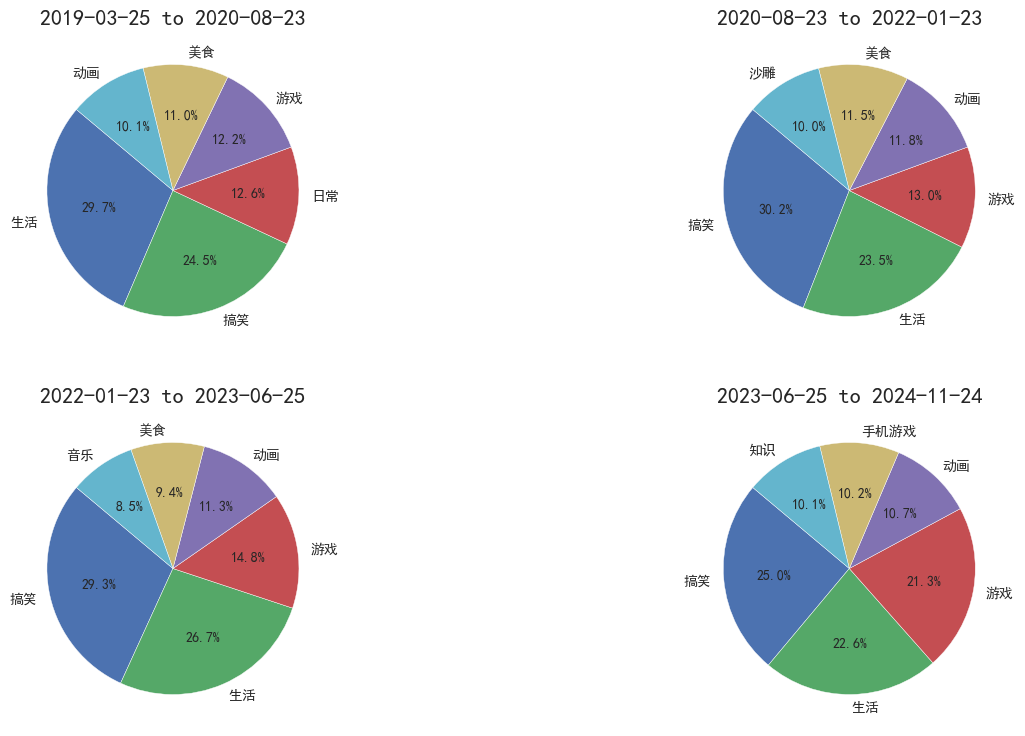

In [52]:
# 分析每个时段的类别分布
def top6_category(group):
    nest_labels_lst = group['标签'].dropna().str.split('/').to_list()  # 嵌套列表
    labels_lst = [item for lst in nest_labels_lst for item in lst]  # 普通列表
    # 统计每种类别的个数
    labels_df = pd.DataFrame(labels_lst)
    labels_df = labels_df.value_counts().reset_index()
    # 获取前六的类别及数量
    top6_labels = labels_df[:6][0].to_list()
    top6_values = labels_df[:6]['count'].to_list()
    return dict(zip(top6_labels, top6_values))

# 分组并应用函数
top6_labels_dict = df.groupby('时段').apply(top6_category)

# 可视化数据
fig, ax = plt.subplots(2, 2, figsize=(16, 9))
# colors = ['#FF6347', '#4682B4', '#32CD32', '#FF4500', '#8A2BE2']  # 使用明显的颜色
for i, labels_dict in enumerate(top6_labels_dict):
    row, col = divmod(i, 2)  # 计算行和列索引
    sizes = labels_dict.values()
    ax[row, col].pie(sizes, labels=labels_dict.keys(), 
                     autopct='%1.1f%%', startangle=140)
    ax[row, col].set_title(top6_labels_dict.index[i], fontsize=16)
    # ax[row, col].legend()
plt.show()


### 不同IP擅长的视频内容

In [53]:
# 不同地区擅长的类型
def skill_labels(group):
    # 排除数据量过少的标签
    if group['标签'].count() > 20:
        nest_labels_lst = group['标签'].dropna().str.split('/').to_list()  # 嵌套列表
        labels_lst = [item for lst in nest_labels_lst for item in lst]  # 普通列表
        # 统计每种类别的个数
        labels_df = pd.DataFrame(labels_lst)
        labels_df = labels_df.value_counts().reset_index()  
        return labels_df[:4]
        
IP_labels_df = df.groupby('IP地址').apply(skill_labels)
IP_labels_df.columns = ['类别', 'count']
IP_labels_series = IP_labels_df['类别']
IP_labels_series['河南']

C:\Users\Yongjie\AppData\Local\Temp\ipykernel_12536\2515263639.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  IP_labels_df = df.groupby('IP地址').apply(skill_labels)


0     搞笑
1     生活
2     动画
3    动物圈
Name: 类别, dtype: object

### 通过多个标签预测相关数据

In [54]:
# 设置权数
weights = {
    '观看次数': 0.3,
    '点赞数': 0.3,
    '收藏数': 0.2,
    '投币数': 0.1,
    '转发数': 0.1
}
# 计算综合热度
df['综合热度'] = (
    df['观看次数'] * weights['观看次数'] +
    df['点赞数'] * weights['点赞数'] +
    df['收藏数'] * weights['收藏数'] +
    df['投币数'] * weights['投币数'] +
    df['转发数'] * weights['转发数']
)

# 观看次数与点赞数的比值
df['互动比率'] = df['观看次数'] / df['点赞数']
sorted_df = df[['标签', '综合热度', '互动比率']].dropna(subset=['标签'], axis=0)  # 去除空值

# 乱序训练数据
train_data = sorted_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_data['标签'] = train_data['标签'].str.split('/')

In [55]:
# 删除不必要的标签
def delete_labels(labels_lst):
    new_labels_lst = [label for label in labels_lst if label in necessary_labels_set]
    if not new_labels_lst:
        return None
    else:
        return new_labels_lst

num_labels_lst = [item for lst in train_data['标签'] for item in lst]
# 取数量前10的标签
necessary_labels = pd.DataFrame(num_labels_lst).value_counts().reset_index()[:1000][0]
# 使用集合提高查找效率
necessary_labels_set = set(necessary_labels)
train_data['部分标签'] = train_data['标签'].apply(delete_labels)

,标签,综合热度,互动比率,部分标签
0,"[游戏, 电子竞技, 娱乐, 搞笑, 王者荣耀]",944510.6,7.650654,"[游戏, 电子竞技, 娱乐, 搞笑, 王者荣耀]"
1,"[音乐, 演奏, 陈奕迅, 英雄联盟, 孤勇者, 冰块, 离谱]",4180437.3,14.602907,"[音乐, 演奏, 陈奕迅, 英雄联盟, 离谱]"
2,"[舞蹈, 宅舞, 周淑怡, 淑芬, 爱杀宝贝, 可爱, 萌, 魔性, 跳舞, 翻跳, 尬舞,...",2093256.5,21.439206,"[舞蹈, 宅舞, 周淑怡, 可爱, 萌, 魔性, 翻跳, 舞蹈, 动感视频]"
3,"[生活, 日常, 原创, 生活记录, Vlog]",848485.1,11.218653,"[生活, 日常, 原创, 生活记录, Vlog]"
4,"[美食, 美食侦探, 全世界都爱中国味, 美食侦探, 试吃, 重庆, 探店, 自助餐, 美食...",988758.2,19.820264,"[美食, 美食侦探, 美食侦探, 试吃, 探店, 美食]"
...,...,...,...,...
9998,"[资讯, 热点, 历史, 美国, 印第安人, 国际, 热点, 种族灭绝, 新华社]",1999721.0,7.714544,"[资讯, 热点, 历史, 美国, 热点, 新华社]"
9999,"[音乐, 原创音乐, 原创歌曲, 说唱, 学习, 高考, 作文, 语文, 高考作文, 全民说...",837786.9,4.460479,"[音乐, 原创音乐, 原创歌曲, 说唱, 学习, 高考, 语文]"
10000,"[动画, 综合, 原创, 动画, 音乐, MV, 单曲, 虚拟UP主, 综合, VUP, 珈...",957945.8,23.732307,"[动画, 综合, 原创, 动画, 音乐, MV, 虚拟UP主, 综合]"
10001,"[生活, 搞笑, 生活记录, 漫展, 二次元, 动漫, 纪录片]",1877024.8,7.096037,"[生活, 搞笑, 生活记录, 漫展, 二次元, 动漫, 纪录片]"


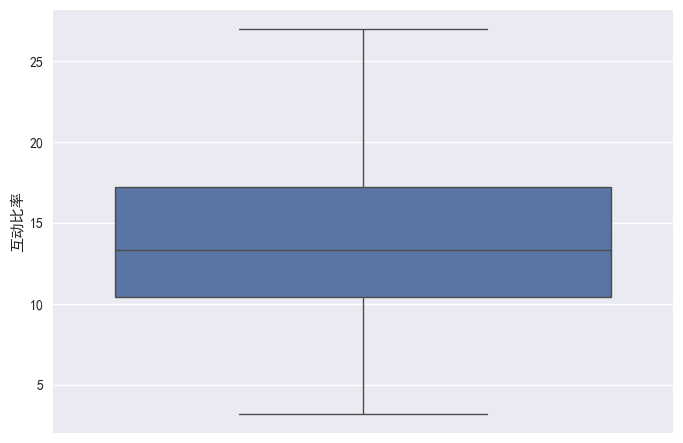

In [56]:
# 绘制箱线图，删除异常值
train_data.dropna(subset=['部分标签'], inplace=True)
train_data = train_data[train_data['互动比率'] < 27]
sns.boxplot(y='互动比率', data=train_data);

# 整合标签数据
# train_data['部分标签'] = train_data['部分标签'].apply(lambda x: tuple(x))  # 将列表转换为元组
# train_data = train_data.groupby('部分标签')['互动比率'].mean().reset_index()
train_data

### 预测互动比率等级

In [57]:
# 互动比率分级
train_data.loc[:, '互动比率等级'] = pd.cut(train_data['互动比率'], 
                                          bins=4, labels=['低', '中', '高', '超高'])

# 处理标签
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(train_data['部分标签'])
ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(train_data['互动比率等级'].values.reshape(-1, 1))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [58]:
# 创建模型
def create_model(num_labels, embedding_dim):
    input_layer = Input(shape=(num_labels, ))  # 输入层
    # 标签嵌入层
    embedding_layer = Embedding(input_dim=num_labels, output_dim=embedding_dim)(input_layer)
    flatten_layer = Flatten()(embedding_layer)
    # 隐藏层
    hidden_layer = Dense(64, activation='relu')(flatten_layer)
    hidden_layer = Dense(32, activation='relu')(hidden_layer)
    output_layer = Dense(4, activation='softmax')(hidden_layer) 

    fnn = Model(inputs=input_layer, outputs=output_layer)
    return fnn

num_labels = X.shape[-1]
embedding_dim = 10  # 增加嵌入维度
model = create_model(num_labels, embedding_dim)

# 编译模型
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 设置回调函数
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 拟合模型
history = model.fit(X_train, y_train, epochs=100, batch_size=512,
                    validation_split=0.1,
                    callbacks=[early_stop])

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'val_loss: {loss}, val_accuracy: {accuracy}')

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4075 - loss: 0.6052 - val_accuracy: 0.4816 - val_loss: 0.5110
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4804 - loss: 0.5119 - val_accuracy: 0.4816 - val_loss: 0.5109
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4740 - loss: 0.5097 - val_accuracy: 0.4816 - val_loss: 0.5095
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4756 - loss: 0.5099 - val_accuracy: 0.4816 - val_loss: 0.5113
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4698 - loss: 0.5118 - val_accuracy: 0.4816 - val_loss: 0.5085
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4787 - loss: 0.5062 - val_accuracy: 0.4816 - val_loss: 0.5060
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4761 - loss: 0.5065 - val_accuracy: 0.4816 - val_loss: 0.5039
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4778 - loss: 0.5016 - val_accuracy: 0.

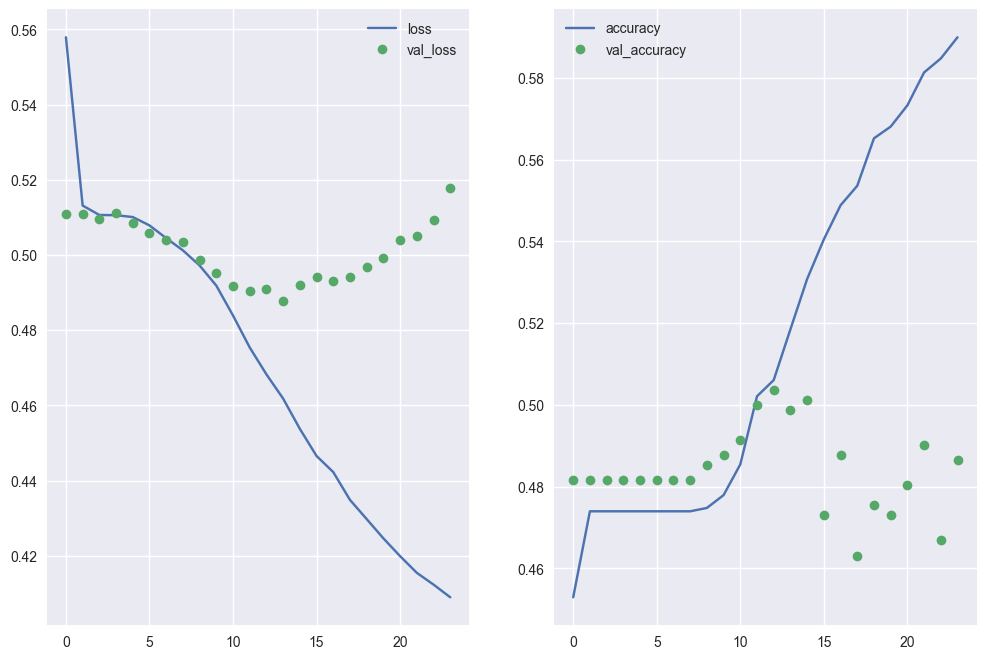

In [59]:
# 读取数据
history_dict = history.history
loss, val_loss = history_dict['loss'], history_dict['val_loss']
accuracy, val_accuracy = history_dict['accuracy'], history_dict['val_accuracy']
epochs = range(len(loss))

# 可视化过程
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].plot(epochs, loss, '-', label='loss')
ax[0].plot(epochs, val_loss, 'o', label='val_loss')
ax[0].legend()
ax[1].plot(epochs, accuracy, '-', label='accuracy')
ax[1].plot(epochs, val_accuracy, 'o', label='val_accuracy')
ax[1].legend()
plt.show()

In [60]:
predicted_values = model.predict(X_test)
predicted_values[0]

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([0.48396584, 0.4875645 , 0.0067431 , 0.02172662], dtype=float32)

### 观看次数与点赞数的关系

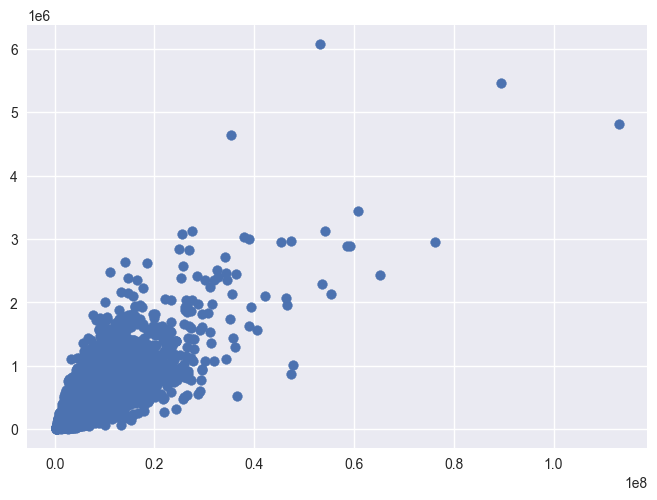

In [61]:
plt.scatter(df["观看次数"], df["点赞数"]);

In [62]:
# 读取数据
data_X = df['观看次数'].values.reshape(-1, 1)
y = df['点赞数'].values.reshape(-1, 1)

# 数据预处理，使数据分布接近标准正态分布
scaler = StandardScaler()
X = scaler.fit_transform(data_X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [63]:
# 创建模型
def create_model(num_labels):
    input_layer = Input(shape=(num_labels,))  # 输入层
    # 隐藏层
    hidden_layer = Dense(64, activation='relu')(input_layer)
    hidden_layer = Dense(64, activation='relu')(hidden_layer)
    hidden_layer = Dense(64, activation='relu')(hidden_layer)
    output_layer = Dense(1)(hidden_layer)

    fnn = Model(inputs=input_layer, outputs=output_layer)
    return fnn


num_labels = X.shape[-1]
model = create_model(num_labels)

# 编译模型
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# 设置回调函数
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 拟合模型
history = model.fit(X_train, y_train, epochs=200, batch_size=1024,
                    validation_split=0.1)
                    # callbacks=[early_stop])

# 评估模型
loss, mae = model.evaluate(X_test, y_test)
print(f'val_loss: {loss}, val_mae: {mae}')

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 261757419520.0000 - mae: 386041.8125 - val_loss: 242538283008.0000 - val_mae: 372956.8125
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 254534189056.0000 - mae: 381259.5938 - val_loss: 242537938944.0000 - val_mae: 372956.4688
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 255257362432.0000 - mae: 384650.5625 - val_loss: 242537496576.0000 - val_mae: 372955.9688
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 240135700480.0000 - mae: 374716.6250 - val_loss: 242536677376.0000 - val_mae: 372955.0625
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 258867068928.0000 - mae: 383908.8750 - val_loss: 242535284736.0000 - val_mae: 372953.6250
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 261553012736.0000 - mae: 383973.5000 - val_loss: 242533056512.0000 - val_mae: 372951.2188
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266725261312.0000 - mae: 386256.8438 - val_loss: 24252956672

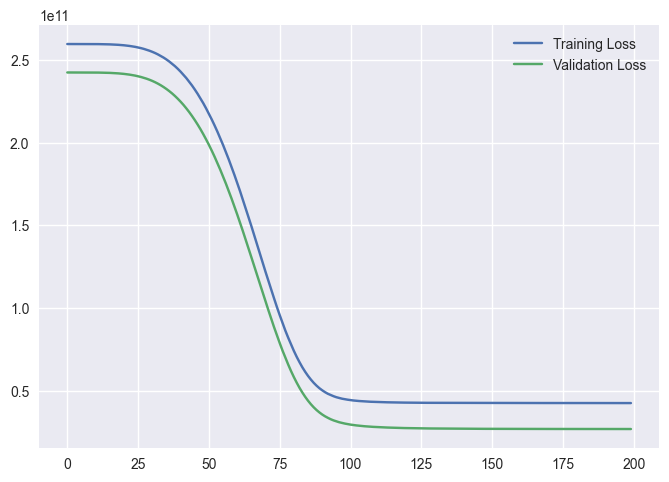

In [64]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()